In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats

 **READ THE DATA SET**

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**CHECK THE SHAPE/DIMENSION OF THE DATASET**

In [ ]:
#SHAPE OF THE DATA
df.shape

(5110, 12)

**CHECK FOR THE MISSING VALUES. DISPLAY NUMBER OF MISSING VALUES PER COLUMN**

In [ ]:
#MISSING VALUES PER COLUMN
count=df.isnull().sum()
percentage=(df.isnull().sum()/len(df))*100
missing_values=pd.concat([count,percentage],axis=1,keys=['count','percentage'])
missing_values

,count,percentage
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
bmi,201,3.933464


**INVESTIGATE AND PREDICT THE MISSING BMI VALUES**

In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df[df['bmi'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


The skewness of bmi is 1.0881872326442346


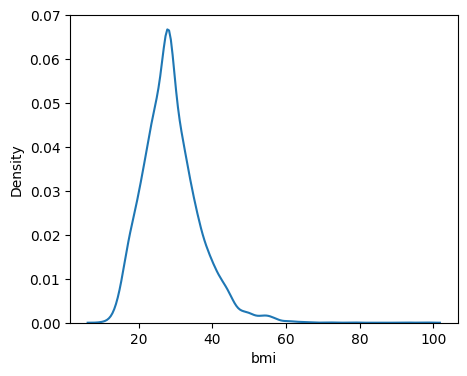

In [ ]:
plt.figure(figsize=(5,4))
sns.kdeplot(df.bmi)
print('The skewness of bmi is',df.bmi.skew())
plt.show()

In [ ]:
#As bmi is right skewed filling null values by median
df.bmi=df.bmi.fillna(df['bmi'].median())
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**CHECK THE DATATYPE, NUMBER OF NON NULL VALUES AND NAME OF EACH VARIABLE IN THE DATASET**

In [ ]:
#DATA TYPES OF THE VARIABLES
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
#NUMBER OF NON-NULL VALUES
print(f"The number of not null values are \n{df.notnull().sum()}")

The number of not null values are 
id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  5110
smoking_status       5110
stroke               5110
dtype: int64


In [ ]:
#NAME OF EACH VARIABLE IN DATASET
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**CHECK THE DESCRIPTIVE STATISTICS OF THE DATASET**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.862035,7.699562,10.30,23.800,28.100,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


**VISUALIZE THE PROPORTION OF STROKE SAMPLES IN THE DATASET**

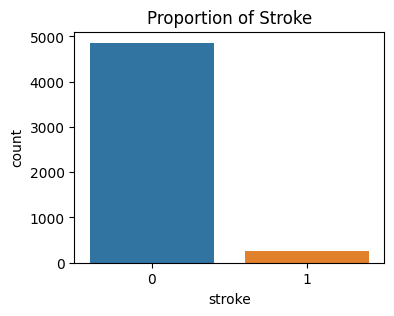

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df.stroke)
plt.title('Proportion of Stroke')
plt.show()

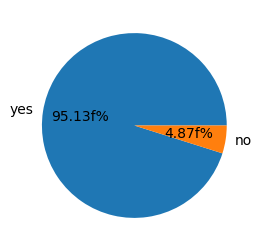

In [ ]:
plt.figure(figsize=(20,3))
plt.pie(df.stroke.value_counts(),autopct='%2.2ff%%',labels=['yes','no'])
plt.show()

The Proportion of Stroke is less as compared to nonstroke people in the dataset

**VISUALIZE THE DISTRIBUTION OF MALE AND FEMALE AGES. WRITE THE OBSERVATION.**

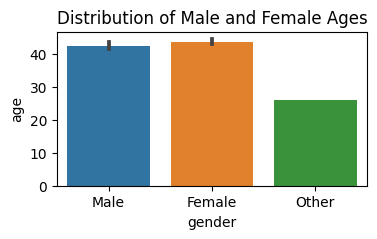

In [ ]:
plt.figure(figsize=(4,2))
plt.title('Distribution of Male and Female Ages')
sns.barplot(x=df['gender'],y=df['age'])
plt.show()

We can see that Distribution of Male and Female Ages are nearly equal.

**VISUALIZE THE STROKE SAMPLE BASED ON GLUCOSE LEVEL AND BMI**



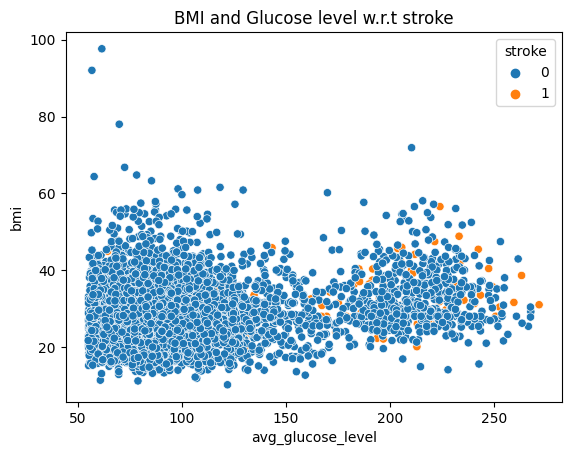

In [ ]:
sns.scatterplot(x=df.avg_glucose_level,y=df.bmi,hue=df.stroke)
plt.title('BMI and Glucose level w.r.t stroke')
plt.show()

As avg_glucose_level increases we can see a few people having stroke

**VISUALIZE THE STROKE SAMPLE BASED ON BMI AND AGE**

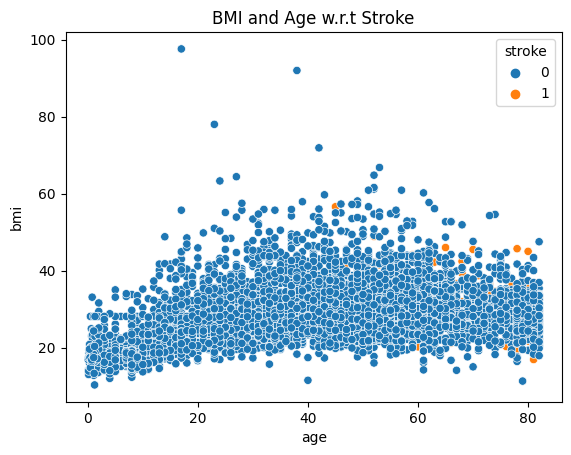

In [ ]:
sns.scatterplot(x=df.age,y=df.bmi,hue=df.stroke)
plt.title('BMI and Age w.r.t Stroke')
plt.show()

As avg_glucose_level increases we can see a few people having stroke

**USING THE PIE CHART VISUALIZE THE PROPORTION OF DIFFERENT SMOKING CATEGORIES AMONG THE STROKE POPULATION**

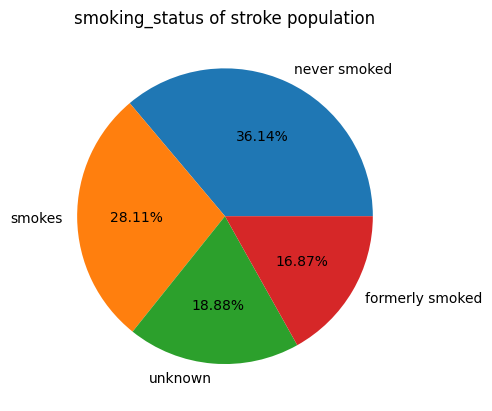

In [ ]:
#sTROKE POPULATION
s=df[df['stroke']==1]

#visualizing
plt.pie(s['smoking_status'].value_counts(),autopct='%.2f%%',labels=['never smoked','smokes','unknown','formerly smoked'])
plt.title('smoking_status of stroke population')
plt.show()

From the above pie plot, we see that the data has high proportionfor never smoked

**PERFORM HYPOTHESIS TESTING TO FIND THE SIGNIFICANT VARIABLES.**

In [ ]:
# Numerical columns
num_cols=df.select_dtypes(include=np.number)

# hypothesis testing between stroke feature and other numerical features
# H0: Both groups have equal mean indicating that they are insignificant.
# H1: Both groups do not have equal mean indicating that they are significant.


significant_features=[]
for i in num_cols:
    if i !='stroke':
        pvalue=stats.ttest_ind(df[i],df.stroke)[1]
        if pvalue<0.05:
            print(i,pvalue)
            significant_features.append(i)
        else:
            print(i,pvalue)

print('The significant_features are\n ',significant_features)


id 0.0
age 0.0
hypertension 2.4828630276395242e-21
heart_disease 0.22637221796027793
avg_glucose_level 0.0
bmi 0.0
The significant_features are
  ['id', 'age', 'hypertension', 'avg_glucose_level', 'bmi']


In [ ]:
#categorical column
cat_cols=df.select_dtypes(exclude=np.number)
cat_cols

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


**DROP THE UNNECESSARY COLUMNS.**

In [ ]:
df1=df.drop('id',axis=1)
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We drop id drop as it is considered as unnecessary column while model building

**WRITE THE CODE TO REPLACE FOLLOWING CATEGORIES COLUMNS IN INTEGER FORMAT AS FOLLOWS**

a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':2

In [ ]:
#encoding work_type variable
df1['work_type']=df1['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':1,'Never_worked':2})

b) ever_married('Yes':1,'No':0)

In [ ]:
#encoding ever_married variable
df1['ever_married']=df1['ever_married'].replace({'Yes': 1, 'No': 0})


In [ ]:
#encoding gender variable
freq=df1.gender.value_counts(normalize=True)
df1['gender']=df1['gender'].replace(freq)


In [ ]:
#encoding smoking_status
df1['smoking_status']=df1['smoking_status'].replace({'formerly smoked':2, 'never smoked':0, 'smokes':1, 'Unknown':0})

In [ ]:
#encoding Residence_type variable
df1['Residence_type']=df1['Residence_type'].replace({'Urban':0,'Rural':1})
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.413894,67.0,0,1,1,0,0,228.69,36.6,2,1
1,0.585910,61.0,0,0,1,1,1,202.21,28.1,0,1
2,0.413894,80.0,0,1,1,0,1,105.92,32.5,0,1
3,0.585910,49.0,0,0,1,0,0,171.23,34.4,1,1
4,0.585910,79.0,1,0,1,1,1,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.585910,80.0,1,0,1,0,0,83.75,28.1,0,0
5106,0.585910,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,0.585910,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,0.413894,51.0,0,0,1,0,1,166.29,25.6,2,0


**EXPLORATARY DATA ANALYSIS**

**CHECK THE DISTRIBUTION OF 'BMI' AND 'STROKE' COLUMNS IN THE DATASET**

The skewness of the bmi column is 1.0881872326442346


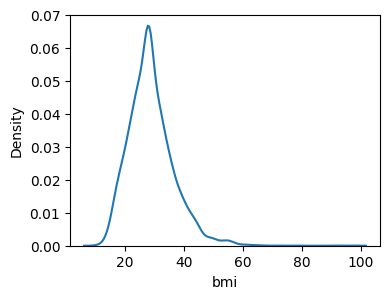

In [ ]:
#distribution of 'bmi'
plt.figure(figsize=(4,3))
sns.kdeplot(df1['bmi'])
print('The skewness of the bmi column is',df1.bmi.skew())
plt.show()

The bmi column is right skewed

The skewness of the stroke column is 4.193284486071313


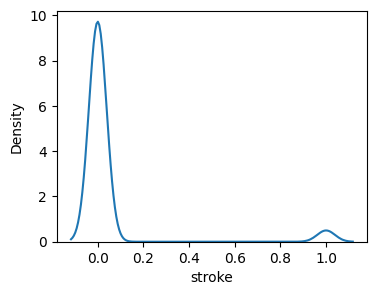

In [ ]:
#distribution of 'stroke'
plt.figure(figsize=(4,3))
sns.kdeplot(df1['stroke'])
print('The skewness of the stroke column is',df1.stroke.skew())
plt.show()

The stroke column is highly right skewed

Skewness of BMI of class 0 is 1.095903631197483
Skewness of BMI of class 1 is 1.1275651326762677


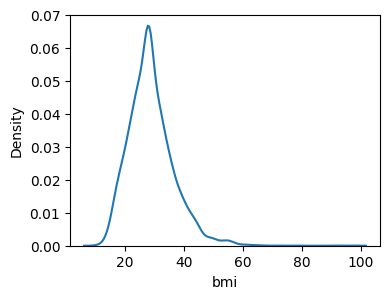

In [ ]:
plt.figure(figsize=(4,3))
sns.kdeplot(df1['bmi'])
print(f"Skewness of BMI of class 0 is {df1.loc[df1['stroke']==0,'bmi'].skew()}")
print(f"Skewness of BMI of class 1 is {df1.loc[df1['stroke']==1,'bmi'].skew()}")

In [ ]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.413894,67.0,0,1,1,0,0,228.69,36.6,2,1
1,0.585910,61.0,0,0,1,1,1,202.21,28.1,0,1
2,0.413894,80.0,0,1,1,0,1,105.92,32.5,0,1
3,0.585910,49.0,0,0,1,0,0,171.23,34.4,1,1
4,0.585910,79.0,1,0,1,1,1,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.585910,80.0,1,0,1,0,0,83.75,28.1,0,0
5106,0.585910,81.0,0,0,1,1,0,125.20,40.0,0,0
5107,0.585910,35.0,0,0,1,1,1,82.99,30.6,0,0
5108,0.413894,51.0,0,0,1,0,1,166.29,25.6,2,0


**LIST DOWN COLUMNS THAT ARE HIGHLY SKEWED**

In [ ]:
highly_skewed=[]
for i in df1.columns:
  if(df1[i].skew()>0.5)|(df1[i].skew()<-0.5):
        highly_skewed.append(i)
print('The highly_skewed columns are\n', highly_skewed)

The highly_skewed columns are
 ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


**COLUMNS THAT ARE HIGHLY KURTOSIS**

In [ ]:
highly_kurt=[]
for i in df1.columns:
  if(df1[i].kurt()>1) | (df1[i].kurt()<-1):
    highly_kurt.append(i)
print('The columns with high kurtosis are\n',highly_kurt)

The columns with high kurtosis are
 ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']


**Plot the heatmap for correlation matrix for the given dataset.  Write the obervation.  Especially note down columns that are highly correalted(Positive or negative correaltion, consider 0.7 to 1 as high)**

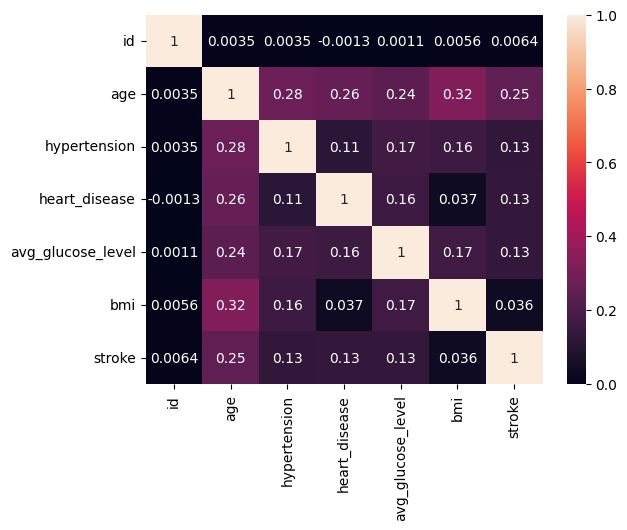

In [ ]:
 sns.heatmap(df.corr(),annot=True)
 plt.show()

Inference:
*   We can see that there is no high high correlation between the variables
*   The highest correlation found is 0.32 between age and bmi
*   The next highest correlation found is 0.28 between hypertension and age
*   id column is highly negative correlated with all columns
*   heart_disease and stroke w.r.t bmi are negatively correlated







**SPLIT THE DATASET RANDOMLY INTO TRAIN AND TEST DATASET.  USE A TRAIN RATIO OF 70:30 RATIO**

In [ ]:
from sklearn.model_selection import train_test_split
x=df1.drop('stroke',axis=1)
y=df1.stroke
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3577, 10)
(1533, 10)
(3577,)
(1533,)


**Check the datset is balanced or imbalanced.  If it is highly investigated, a different approach to balanced the dataset by using the correct technique.**

In [ ]:
df.stroke.value_counts(normalize=True)*100


0    95.127202
1     4.872798
Name: stroke, dtype: float64

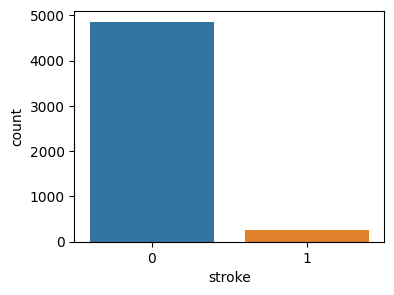

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x=df.stroke)
plt.show()

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Before smote',Counter(y))
smote=SMOTE(sampling_strategy=0.5,random_state=0)
x_sm,y_sm=smote.fit_resample(x,y)
print('After smote', Counter(y_sm))


Before smote Counter({0: 4861, 1: 249})
After smote Counter({0: 4861, 1: 2430})


**UNIVARIATE ANALYSIS**

In [ ]:
num_cols=['age','avg_glucose_level', 'bmi']
cat_cols=['hypertension', 'heart_disease','gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status','stroke']

-0.1370593225984694
1.5722838665030459
1.0881872326442346


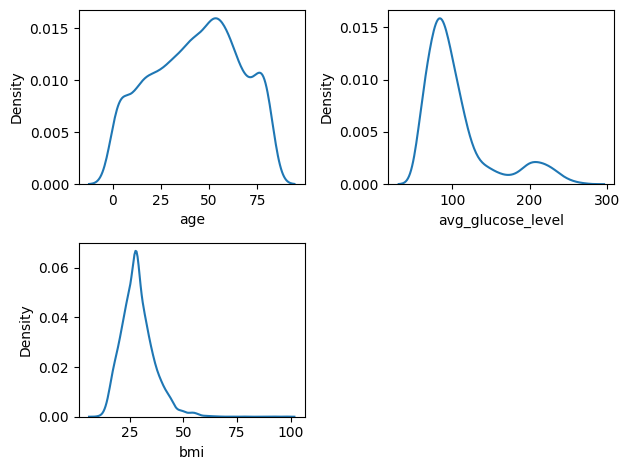

In [ ]:
# numerical
it=1
for i in num_cols:
    plt.subplot(2,2,it)
    print(df[i].skew())
    sns.kdeplot(df.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

avg_glucose right skewed

**BIVARIATE ANALYSIS**

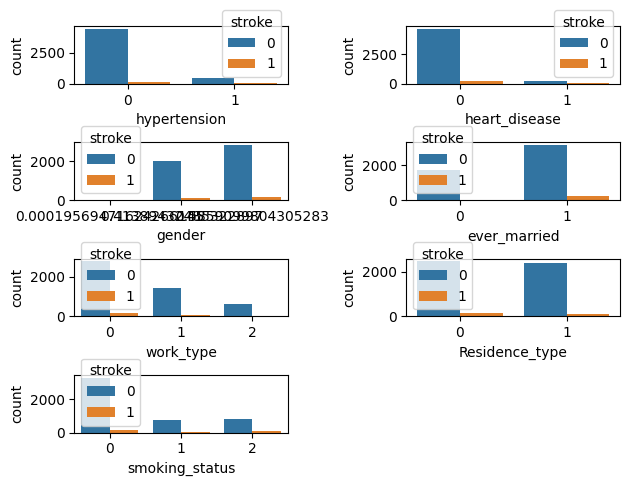

In [ ]:
# categorical vs cat
it=1
for i in cat_cols[:-1]:
    plt.subplot(4,2,it)
    sns.countplot(x=df1.loc[:,i],hue=df.stroke)
    it+=1
plt.tight_layout()
plt.show()

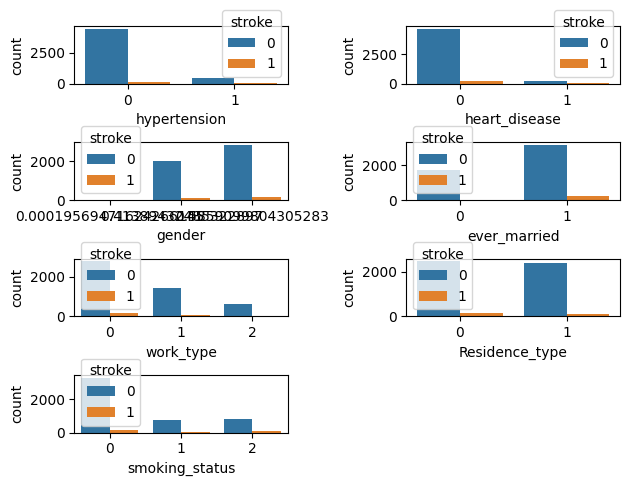

In [ ]:
# categorical vs cat
it=1
for i in cat_cols[:-1]:
    plt.subplot(4,2,it)
    sns.countplot(x=df1.loc[:,i],hue=df.stroke)
    it+=1
plt.tight_layout()
plt.show()


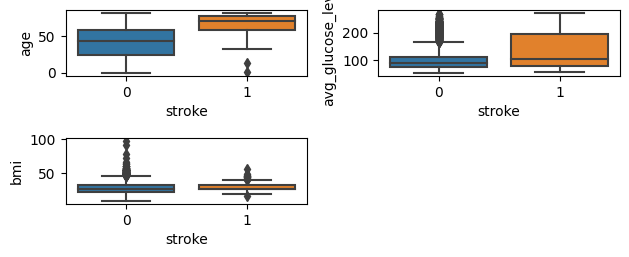

In [ ]:
# num vs cat
it=1
for i in num_cols:
    plt.subplot(4,2,it)
    sns.boxplot(x=df1.stroke,y=df1.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

**MULTIVARIATE ANALYSIS**

<Axes: >

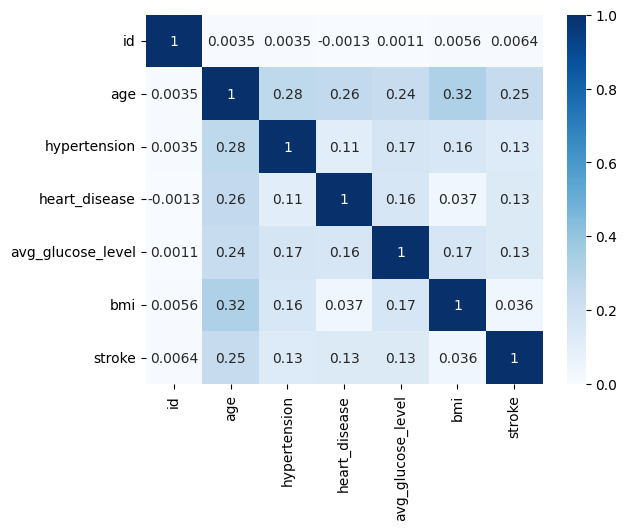

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

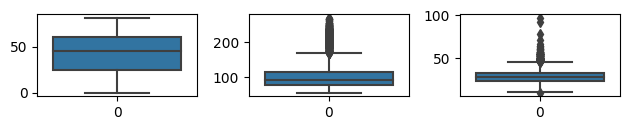

In [ ]:
## Outliers
it=1
for i in num_cols:
    plt.subplot(4,3,it)
    sns.boxplot(df.loc[:,i])
    it+=1
plt.tight_layout()
plt.show()

**STATISTICAL TEST**

In [ ]:
# numerical
from scipy import stats
sig=[]
for i in num_cols:
    zero=df.loc[df['stroke']==0,i]
    ones=df.loc[df['stroke']==1,i]
    s,pvalue=stats.ttest_ind(zero,ones)
    if pvalue<0.05:
        sig.append(i)
print(sig)

['age', 'avg_glucose_level', 'bmi']


In [ ]:
# categorical
sig=[]
for i in cat_cols[:-1]:
    tab=pd.crosstab(df[i],df.stroke)
    s,pvalue,dof,exp=stats.chi2_contingency(tab)
    if pvalue<0.05:
        sig.append(i)
print(sig)


['hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status']


**FEATURE ENGINEERING**

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
weight_cat=[]
for i in df.bmi:
    if i < 18.5:
        weight_cat.append('underweight')
    elif (18.5<=i) and (i<=24.9):
        weight_cat.append('normal')
    elif (25<=i) and (i<=29.9):
        weight_cat.append('overweight')
    else:
        weight_cat.append('obesity')
df['bmi_cat']=weight_cat

In [ ]:
dia=[]
for i in df["avg_glucose_level"]:
    if i <=100:
        dia.append("normal")
    elif i > 100 and i <=126:
        dia.append("pre-diabetic")
    else:
        dia.append("diabetic")

df["diabeties"]=dia

In [ ]:
age1=[]
for i in df.age:
    if i <=18:
        age1.append('Young')
    elif (i>18) and (i<=50):
        age1.append('Adult')
    else:
        age1.append('Old')
df['age_cat']=age1

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,diabeties,age_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obesity,diabetic,Old
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,overweight,diabetic,Old
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obesity,pre-diabetic,Old
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obesity,diabetic,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,normal,diabetic,Old


**SCALING**

In [ ]:
df1=df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
for i in num_cols:
    df1[i]=mm.fit_transform(df[[i]])

In [ ]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,diabeties,age_cat
0,9046,Male,0.816895,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1,obesity,diabetic,Old
1,51676,Female,0.743652,0,0,Yes,Self-employed,Rural,0.679023,0.203895,never smoked,1,overweight,diabetic,Old
2,31112,Male,0.975586,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1,obesity,pre-diabetic,Old
3,60182,Female,0.597168,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1,obesity,diabetic,Adult
4,1665,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1,normal,diabetic,Old


**ENCODING**

In [ ]:
df1=pd.get_dummies(df1,drop_first=True)

In [ ]:
df1.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_cat_obesity,bmi_cat_overweight,bmi_cat_underweight,diabeties_normal,diabeties_pre-diabetic,age_cat_Old,age_cat_Young
0,9046,0.816895,0,1,0.801265,0.301260,1,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,51676,0.743652,0,0,0.679023,0.203895,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,31112,0.975586,0,1,0.234512,0.254296,1,1,0,1,...,0,1,0,1,0,0,0,1,1,0
3,60182,0.597168,0,0,0.536008,0.276060,1,0,0,1,...,0,0,1,1,0,0,0,0,0,0
4,1665,0.963379,1,0,0.549349,0.156930,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


**SPLITING THE DATA**

In [ ]:
from sklearn.model_selection import train_test_split
x=df1.drop('stroke',axis=1)
y=df1.stroke
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from colorsys import yiq_to_rgb
#Spliting the data after SMOTE
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.30,random_state=0)

**MODEL SELECTION/HYPERPARAMETER TUNING**

*   Try different models and fine tune their performance until you get the desired level of performance on the given dataset.
*   Evaluate the models using appropriate evaluation metrics



**LOGISTICS REGRESSION-SKLEARN**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_model=lr.fit(xtrain,ytrain)
ypred_lr_train=lr_model.predict(xtrain)
ypred_lr_test=lr_model.predict(xtest)
yprob_lr=lr_model.predict_proba(xtest)[:,1]

**EVALUATION METRICS**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score
cols=['Model_name','Train_accuracy','Test_accuracy','precision','recall','kappa','f1_score','roc_auc_score']
result=pd.DataFrame(columns=cols)
model_stats=pd.Series({'Model_name':'LogisticRegression',
                       'Train_accuracy':accuracy_score(ytrain,ypred_lr_train),
                       'Test_accuracy':accuracy_score(ytest,ypred_lr_test),
                       'precision':precision_score(ytest,ypred_lr_test),
                       'recall':recall_score(ytest,ypred_lr_test),
                       'kappa':cohen_kappa_score(ytest,ypred_lr_test),
                       'f1_score':f1_score(ytest,ypred_lr_test),
                       'roc_auc_score':roc_auc_score(ytest,yprob_lr)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.81947,0.773354,0.671543,0.586879,0.718861,0.890602


**DECISION TREE - BASE MODEL**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt_model=dt.fit(xtrain,ytrain)
yred_dt_train=dt_model.predict(xtrain)
yred_dt_test=dt_model.predict(xtest)
yprob_dt=dt_model.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'DecisionTree',
              'Train_accuracy':accuracy_score(ytrain,yred_dt_train),
              'Test_accuracy':accuracy_score(ytest,yred_dt_test),
               'precision':precision_score(ytest,yred_dt_test),
                'recall':recall_score(ytest,yred_dt_test),
                 'kappa':cohen_kappa_score(ytest,yred_dt_test),
                'f1_score':f1_score(ytest,yred_dt_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_dt)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770


We can see that the model is performing good and its overfits

In [ ]:
## Grid Search Cv
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight='balanced',random_state=0)
params=({'criterion':['gini','entropy'],'max_depth':[5,6,7]})
grid=GridSearchCV(dt,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'criterion': 'gini', 'max_depth': 7}

**DECISION TREE MODEL WITH HYPERPARAMETER TUNING**

In [ ]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt1_model=dt1.fit(xtrain,ytrain)
ypred_dt1_train=dt1_model.predict(xtrain)
ypred_dt1_test=dt1_model.predict(xtest)
yprob_dt1=dt1_model.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'Decision Tree with Gridsearchcv',
              'Train_accuracy':accuracy_score(ytrain,ypred_dt1_train),
              'Test_accuracy':accuracy_score(ytest,ypred_dt1_test),
               'precision':precision_score(ytest,ypred_dt1_test),
                'recall':recall_score(ytest,ypred_dt1_test),
                 'kappa':cohen_kappa_score(ytest,ypred_dt1_test),
                'f1_score':f1_score(ytest,ypred_dt1_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_dt1)})
result=result.append(model_stats,ignore_index=True)
result


,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770
2,Decision Tree with Gridsearchcv,0.844797,0.836837,0.823241,0.668883,0.621424,0.738078,0.913458


**RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(xtrain,ytrain)
ypred_rf_train=rf_model.predict(xtrain)
ypred_rf_test=rf_model.predict(xtest)
yprob_rf=rf_model.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'Random Forest',
                       'Train_accuracy':accuracy_score(ytrain,ypred_rf_train),
                       'Test_accuracy': accuracy_score(ytest,ypred_rf_test),
                       'precision':precision_score(ytest,ypred_rf_test),
                       'recall':recall_score(ytest,ypred_rf_test),
                       'kappa':cohen_kappa_score(ytest,ypred_rf_test),
                       'f1_score':f1_score(ytest,ypred_rf_test),
                       'roc_auc_score':roc_auc_score(ytest,yprob_rf)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770
2,Decision Tree with Gridsearchcv,0.844797,0.836837,0.823241,0.668883,0.621424,0.738078,0.913458
3,Random Forest,1.000000,0.928702,0.922096,0.865691,0.839623,0.893004,0.977678


**K NEAREST NEIGHBOUR(KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
knn_model=kn.fit(xtrain,ytrain)
ypred_knn_train=knn_model.predict(xtrain)
ypred_knn_test=knn_model.predict(xtest)
yprob_knn=knn_model.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'K Nearest Neigbors',
                       'Train_accuracy':accuracy_score(ytrain,ypred_knn_train),
                       'Test_accuracy':accuracy_score(ytest,ypred_knn_test),
                       'precision':precision_score(ytest,ypred_knn_test),
                       'recall':recall_score(ytest,ypred_knn_test),
                       'kappa':cohen_kappa_score(ytest,ypred_knn_test),
                       'f1_score':f1_score(ytest,ypred_knn_test),
                       'roc_auc_score':roc_auc_score(ytest,yprob_knn)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770
2,Decision Tree with Gridsearchcv,0.844797,0.836837,0.823241,0.668883,0.621424,0.738078,0.913458
3,Random Forest,1.000000,0.928702,0.922096,0.865691,0.839623,0.893004,0.977678
4,K Nearest Neigbors,0.911229,0.868830,0.749731,0.928191,0.724844,0.829471,0.941348


**NAIVE BAYES ALGORITHM**

**GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_model=gnb.fit(xtrain,ytrain)
ypred_gnb_train=gnb.predict(xtrain)
ypred_gnb_test=gnb.predict(xtest)
yprob_gnb=gnb.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'GaussianNB',
                       'Train_accuracy':accuracy_score(ytrain,ypred_gnb_train),
                       'Test_accuracy':accuracy_score(ytest,ypred_gnb_test),
                       'precision':precision_score(ytest,ypred_gnb_test),
                       'recall':recall_score(ytest,ypred_gnb_test),
                       'kappa':cohen_kappa_score(ytest,ypred_gnb_test),
                       'f1_score':f1_score(ytest,ypred_gnb_test),
                       'roc_auc_score':roc_auc_score(ytest,yprob_gnb)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770
2,Decision Tree with Gridsearchcv,0.844797,0.836837,0.823241,0.668883,0.621424,0.738078,0.913458
3,Random Forest,1.000000,0.928702,0.922096,0.865691,0.839623,0.893004,0.977678
4,K Nearest Neigbors,0.911229,0.868830,0.749731,0.928191,0.724844,0.829471,0.941348
5,GaussianNB,0.772879,0.794333,0.676815,0.768617,0.558379,0.719801,0.864841


**BernoulliNB**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb_model=bnb.fit(xtrain,ytrain)
ypred_bnb_train=bnb_model.predict(xtrain)
ypred_bnb_test=bnb_model.predict(xtest)
yprob_bnb=bnb_model.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'BernoulliNB',
                       'Train_accuracy':accuracy_score(ytrain,ypred_bnb_train),
                       'Test_accuracy':accuracy_score(ytest,ypred_bnb_test),
                       'precision':precision_score(ytest,ypred_bnb_test),
                       'recall':recall_score(ytest,ypred_bnb_test),
                       'kappa':cohen_kappa_score(ytest,ypred_bnb_test),
                       'f1_score':f1_score(ytest,ypred_bnb_test),
                       'roc_auc_score':roc_auc_score(ytest,yprob_bnb)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770
2,Decision Tree with Gridsearchcv,0.844797,0.836837,0.823241,0.668883,0.621424,0.738078,0.913458
3,Random Forest,1.000000,0.928702,0.922096,0.865691,0.839623,0.893004,0.977678
4,K Nearest Neigbors,0.911229,0.868830,0.749731,0.928191,0.724844,0.829471,0.941348
5,GaussianNB,0.772879,0.794333,0.676815,0.768617,0.558379,0.719801,0.864841
6,BernoulliNB,0.679992,0.691042,0.562295,0.456117,0.282907,0.503671,0.693971


**BAGGING CLASSIFIER**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc_model=bc.fit(xtrain,ytrain)
ypred_bc_train=bc_model.predict(xtrain)
ypred_bc_test=bc_model.predict(xtest)
yprob_bc=bc_model.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'Bagging Classifier',
                       'Train_accuracy':accuracy_score(ytrain,ypred_bc_train),
                       'Test_accuracy':accuracy_score(ytest,ypred_bc_test),
                       'precision':precision_score(ytest,ypred_bc_test),
                       'recall':recall_score(ytest,ypred_bc_test),
                       'kappa':cohen_kappa_score(ytest,ypred_bc_test),
                       'f1_score':f1_score(ytest,ypred_bc_test),
                       'roc_auc_score':roc_auc_score(ytest,yprob_bc)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770
2,Decision Tree with Gridsearchcv,0.844797,0.836837,0.823241,0.668883,0.621424,0.738078,0.913458
3,Random Forest,1.000000,0.928702,0.922096,0.865691,0.839623,0.893004,0.977678
4,K Nearest Neigbors,0.911229,0.868830,0.749731,0.928191,0.724844,0.829471,0.941348
5,GaussianNB,0.772879,0.794333,0.676815,0.768617,0.558379,0.719801,0.864841
6,BernoulliNB,0.679992,0.691042,0.562295,0.456117,0.282907,0.503671,0.693971
7,Bagging Classifier,0.994513,0.912706,0.900143,0.839096,0.803324,0.868548,0.969007


**BOOSTING METHODS**

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad_model=ad.fit(xtrain,ytrain)
ypred_ad_train=ad_model.predict(xtrain)
ypred_ad_test=ad_model.predict(xtest)
yprob_ad=ad_model.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'AdaBoost',
              'Train_accuracy':accuracy_score(ytrain,ypred_ad_train),
              'Test_accuracy':accuracy_score(ytest,ypred_ad_test),
              'precision':precision_score(ytest,ypred_ad_test),
              'recall':recall_score(ytest,ypred_ad_test),
              'kappa':cohen_kappa_score(ytest,ypred_ad_test),
              'f1_score':f1_score(ytest,ypred_ad_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_ad)})
result=result.append(model_stats,ignore_index=True)
result


,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770
2,Decision Tree with Gridsearchcv,0.844797,0.836837,0.823241,0.668883,0.621424,0.738078,0.913458
3,Random Forest,1.000000,0.928702,0.922096,0.865691,0.839623,0.893004,0.977678
4,K Nearest Neigbors,0.911229,0.868830,0.749731,0.928191,0.724844,0.829471,0.941348
5,GaussianNB,0.772879,0.794333,0.676815,0.768617,0.558379,0.719801,0.864841
6,BernoulliNB,0.679992,0.691042,0.562295,0.456117,0.282907,0.503671,0.693971
7,Bagging Classifier,0.994513,0.912706,0.900143,0.839096,0.803324,0.868548,0.969007
8,AdaBoost,0.872428,0.872029,0.852239,0.759309,0.708774,0.803094,0.939798


**GRADIENTBOOSTING**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb_model=gb.fit(xtrain,ytrain)
ypred_gb_train=gb_model.predict(xtrain)
ypred_gb_test=gb_model.predict(xtest)
yprob_gb=gb_model.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'GradientBoosting',
              'Train_accuracy':accuracy_score(ytrain,ypred_gb_train),
              'Test_accuracy':accuracy_score(ytest,ypred_gb_test),
               'precision':precision_score(ytest,ypred_gb_test),
                'recall':recall_score(ytest,ypred_gb_test),
                 'kappa':cohen_kappa_score(ytest,ypred_gb_test),
                'f1_score':f1_score(ytest,ypred_gb_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_gb)})
result=result.append(model_stats,ignore_index=True)
result


,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770
2,Decision Tree with Gridsearchcv,0.844797,0.836837,0.823241,0.668883,0.621424,0.738078,0.913458
3,Random Forest,1.000000,0.928702,0.922096,0.865691,0.839623,0.893004,0.977678
4,K Nearest Neigbors,0.911229,0.868830,0.749731,0.928191,0.724844,0.829471,0.941348
5,GaussianNB,0.772879,0.794333,0.676815,0.768617,0.558379,0.719801,0.864841
6,BernoulliNB,0.679992,0.691042,0.562295,0.456117,0.282907,0.503671,0.693971
7,Bagging Classifier,0.994513,0.912706,0.900143,0.839096,0.803324,0.868548,0.969007
8,AdaBoost,0.872428,0.872029,0.852239,0.759309,0.708774,0.803094,0.939798
9,GradientBoosting,0.912013,0.894424,0.890555,0.789894,0.759504,0.837209,0.953927


**XGBOOST**

In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg_model=xg.fit(xtrain,ytrain)
ypred_xg_train=xg_model.predict(xtrain)
ypred_xg_test=xg_model.predict(xtest)
yprob_xg=xg_model.predict_proba(xtest)[:,1]

In [ ]:
model_stats=pd.Series({'Model_name':'XGBoost',
              'Train_accuracy':accuracy_score(ytrain,ypred_xg_train),
              'Test_accuracy':accuracy_score(ytest,ypred_xg_test),
               'precision':precision_score(ytest,ypred_xg_test),
                'recall':recall_score(ytest,ypred_xg_test),
                 'kappa':cohen_kappa_score(ytest,ypred_xg_test),
                'f1_score':f1_score(ytest,ypred_xg_test),
              'roc_auc_score':roc_auc_score(ytest,yprob_xg)})
result=result.append(model_stats,ignore_index=True)
result

,Model_name,Train_accuracy,Test_accuracy,precision,recall,kappa,f1_score,roc_auc_score
0,LogisticRegression,0.808152,0.819470,0.773354,0.671543,0.586879,0.718861,0.890602
1,DecisionTree,1.000000,0.897166,0.845347,0.857713,0.772848,0.851485,0.887770
2,Decision Tree with Gridsearchcv,0.844797,0.836837,0.823241,0.668883,0.621424,0.738078,0.913458
3,Random Forest,1.000000,0.928702,0.922096,0.865691,0.839623,0.893004,0.977678
4,K Nearest Neigbors,0.911229,0.868830,0.749731,0.928191,0.724844,0.829471,0.941348
5,GaussianNB,0.772879,0.794333,0.676815,0.768617,0.558379,0.719801,0.864841
6,BernoulliNB,0.679992,0.691042,0.562295,0.456117,0.282907,0.503671,0.693971
7,Bagging Classifier,0.994513,0.912706,0.900143,0.839096,0.803324,0.868548,0.969007
8,AdaBoost,0.872428,0.872029,0.852239,0.759309,0.708774,0.803094,0.939798
9,GradientBoosting,0.912013,0.894424,0.890555,0.789894,0.759504,0.837209,0.953927
